In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import operator
import csv
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
from sklearn.impute import SimpleImputer

%matplotlib inline
import ipynb.fs.defs.functions as func

In [2]:
CORRELATION_THRESHOLD = 1.
register_matplotlib_converters()
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
data = pd.read_csv('pd_speech_features.csv', sep=",", decimal='.', header=[0,1])
data.head(5)

Unnamed: 0_level_0 Unnamed: 1_level_0 Baseline Features Unnamed: 3_level_0 Unnamed: 4_level_0 Unnamed: 5_level_0 Unnamed: 6_level_0 Unnamed: 7_level_0 Unnamed: 8_level_0 Unnamed: 9_level_0 Unnamed: 10_level_0 Unnamed: 11_level_0 Unnamed: 12_level_0 Unnamed: 13_level_0 Unnamed: 14_level_0 Unnamed: 15_level_0 Unnamed: 16_level_0 Unnamed: 17_level_0 Unnamed: 18_level_0 Unnamed: 19_level_0     Unnamed: 20_level_0        Unnamed: 21_level_0        Unnamed: 22_level_0 Intensity Parameters Unnamed: 24_level_0 Unnamed: 25_level_0 Formant Frequencies Unnamed: 27_level_0 Unnamed: 28_level_0 Unnamed: 29_level_0 Bandwidth Parameters Unnamed: 31_level_0 Unnamed: 32_level_0 Unnamed: 33_level_0 Vocal Fold Unnamed: 35_level_0 Unnamed: 36_level_0 Unnamed: 37_level_0 Unnamed: 38_level_0 Unnamed: 39_level_0 Unnamed: 40_level_0 Unnamed: 41_level_0 Unnamed: 42_level_0 Unnamed: 43_level_0 Unnamed: 44_level_0 Unnamed: 45_level_0 Unnamed: 46_level_0 Unnamed: 47_level_0 Unnamed: 48_level_0  \
                  id             gender               PPE                DFA               RPDE          numPulses   numPeriodsPulses   meanPeriodPulses stdDevPeriodPulses       locPctJitter        locAbsJitter           rapJitter          ppq5Jitter           ddpJitter          locShimmer        locDbShimmer         apq3Shimmer         apq5Shimmer        apq11Shimmer          ddaShimmer meanAutoCorrHarmonicity meanNoiseToHarmHarmonicity meanHarmToNoiseHarmonicity         minIntensity        maxIntensity       meanIntensity                  f1                  f2                  f3                  f4                   b1                  b2                  b3                  b4 GQ_prc5_95   GQ_std_cycle_open GQ_std_cycle_closed            GNE_mean             GNE_std        GNE_SNR_TKEO         GNE_SNR_SEO        GNE_NSR_TKEO         GNE_NSR_SEO           VFER_mean            VFER_std        VFER_entropy       VFER_SNR_TKEO        VFER_SNR_SEO       VFER_NSR_TKEO   
0                  0                  1           0.85247            0.71826            0.57227                240                239           0.008064           0.000087            0.00218            0.000018             0.00067             0.00129             0.00200             0.05883               0.517             0.03011             0.03496             0.04828             0.09034                0.970805                   0.036223                     18.995            69.997496           76.088046           72.465512          539.342735         1031.849040         2447.162183         3655.054806           101.092218           83.147440          255.214830          396.643631    0.77778             11.7245              2.8277             1.17300             0.26512            0.083127         1200445.612              1.5347              3.0152            0.000463            0.000260             0.83621            209.6062            455.9654              1.2825   
1                  0                  1           0.76686            0.69481            0.53966                234                233           0.008258           0.000073            0.00195            0.000016             0.00052             0.00112             0.00157             0.05516               0.502             0.02320             0.03675             0.06195             0.06961                0.984322                   0.017974                     21.497            67.415903           73.046374           71.528945          564.363614         1016.367294         2383.565201         3498.681572            58.465428           86.487292          248.357127          218.229722    0.81250             13.8284              2.8908             1.02210             0.22004            0.127410         1298455.445              1.6029              3.0600            0.000615            0.000295             1.04550            243.0816            379.8429              1.3063   
2                  0                  1           0.85083     

In [4]:
# Rename the columns for a more appealing view
prev_col_name = ''
column_names = []
for c in data.columns:
    if not c[0].startswith('Unnamed'):
        prev_col_name = c[0]
    column_names.append(f'{prev_col_name}-{c[1]}')
column_names[-1] = 'class'
data.columns = column_names

In [5]:
data.head()

-id  -gender  Baseline Features-PPE  Baseline Features-DFA  Baseline Features-RPDE  Baseline Features-numPulses  Baseline Features-numPeriodsPulses  Baseline Features-meanPeriodPulses  Baseline Features-stdDevPeriodPulses  Baseline Features-locPctJitter  Baseline Features-locAbsJitter  Baseline Features-rapJitter  Baseline Features-ppq5Jitter  Baseline Features-ddpJitter  Baseline Features-locShimmer  Baseline Features-locDbShimmer  Baseline Features-apq3Shimmer  Baseline Features-apq5Shimmer  Baseline Features-apq11Shimmer  Baseline Features-ddaShimmer  Baseline Features-meanAutoCorrHarmonicity  Baseline Features-meanNoiseToHarmHarmonicity  Baseline Features-meanHarmToNoiseHarmonicity  Intensity Parameters-minIntensity  Intensity Parameters-maxIntensity  Intensity Parameters-meanIntensity  Formant Frequencies-f1  Formant Frequencies-f2  Formant Frequencies-f3  Formant Frequencies-f4  Bandwidth Parameters-b1  Bandwidth Parameters-b2  Bandwidth Parameters-b3  \
0    0        1                0.85247                0.71826                 0.57227                          240                                 239                            0.008064                              0.000087                         0.00218                        0.000018                      0.00067                       0.00129                      0.00200                       0.05883                           0.517                        0.03011                        0.03496                         0.04828                       0.09034                                   0.970805                                      0.036223                                        18.995                          69.997496                          76.088046                           72.465512              539.342735             1031.849040             2447.162183             3655.054806               101.092218                83.147440               255.214830   
1    0        1                0.76686                0.69481                 0.53966                          234                                 233                            0.008258                              0.000073                         0.00195                        0.000016                      0.00052                       0.00112                      0.00157                       0.05516                           0.502                        0.02320                        0.03675                         0.06195                       0.06961                                   0.984322                                      0.017974                                        21.497                          67.415903                          73.046374                           71.528945              564.363614             1016.367294             2383.565201             3498.681572                58.465428                86.487292               248.357127   
2    0        1                0.85083                0.67604                 0.58982                          232                                 231                            0.008340                              0.000060                         0.00176                        0.000015                      0.00057                       0.00111                      0.00171                       0.09902                           0.897                        0.05094                        0.06497                         0.07772                       0.15282                                   0.974846                                      0.026313                                        17.651                          62.661706                          71.633549                           68.086583              548.444604             1032.406341             2357.826954             3678.128717               160.387771                54.685168               151.694847   
3    1        0                0.41121                0.79672                 0.59257      

## Normalize variables

In [6]:
for c in data.columns[2:-1]:
    data[c] = (data[c] - data[c].mean()) / data[c].std()
data.head()

-id  -gender  Baseline Features-PPE  Baseline Features-DFA  Baseline Features-RPDE  Baseline Features-numPulses  Baseline Features-numPeriodsPulses  Baseline Features-meanPeriodPulses  Baseline Features-stdDevPeriodPulses  Baseline Features-locPctJitter  Baseline Features-locAbsJitter  Baseline Features-rapJitter  Baseline Features-ppq5Jitter  Baseline Features-ddpJitter  Baseline Features-locShimmer  Baseline Features-locDbShimmer  Baseline Features-apq3Shimmer  Baseline Features-apq5Shimmer  Baseline Features-apq11Shimmer  Baseline Features-ddaShimmer  Baseline Features-meanAutoCorrHarmonicity  Baseline Features-meanNoiseToHarmHarmonicity  Baseline Features-meanHarmToNoiseHarmonicity  Intensity Parameters-minIntensity  Intensity Parameters-maxIntensity  Intensity Parameters-meanIntensity  Formant Frequencies-f1  Formant Frequencies-f2  Formant Frequencies-f3  Formant Frequencies-f4  Bandwidth Parameters-b1  Bandwidth Parameters-b2  Bandwidth Parameters-b3  \
0    0        1               0.627229               0.255975                0.605434                    -0.846332                           -0.841816                            0.932711                             -0.406982                       -0.054957                        0.037818                     0.066285                      0.078149                     0.062852                     -0.201150                       -0.233734                      -0.190700                      -0.228779                       -0.208796                     -0.190551                                   0.145047                                     -0.142556                                      0.024275                          -0.093823                          -0.007341                           -0.218224               -0.799003               -1.194645               -0.293055                0.309878                -0.365732                -0.475482                -0.373314   
1    0        1               0.121539              -0.080380                0.368171                    -0.906804                           -0.902176                            1.039326                             -0.425810                       -0.142476                       -0.027680                    -0.086665                     -0.023240                    -0.083304                     -0.286561                       -0.272943                      -0.499656                      -0.162885                        0.193984                     -0.499508                                   0.355937                                     -0.317054                                      0.472946                          -0.385257                          -0.479178                           -0.351676               -0.613605               -1.286204               -0.454749               -0.139645                -0.504592                -0.468062                -0.382405   
2    0        1               0.617541              -0.349607                0.733124                    -0.926961                           -0.922296                            1.083858                             -0.443263                       -0.214774                       -0.088812                    -0.035681                     -0.029204                    -0.035719                      0.734174                        0.759549                       0.740638                       0.875955                        0.658639                      0.740643                                   0.208094                                     -0.237316                                     -0.216738                          -0.921953                          -0.698341                           -0.842180               -0.731561               -1.191349               -0.520189                0.376208                -0.172572                -0.538714                -0.510546   
3    1        0              -1.979250               1.381365                0.753132      

## Single Variable Analysis

In [7]:
# Top variables with missing values:
mv = {}
for var in data:
    mv[var] = data[var].isna().sum()

top_missing = sorted(mv.items(), key=operator.itemgetter(1), reverse=True)
if any([nb_missing for nb_missing in mv.values()]):
    print(top_missing)
else:
    print('No missing values in the whole dataset!')

No missing values in the whole dataset!


In [8]:
# Very informative...
data.describe()

-id     -gender  Baseline Features-PPE  Baseline Features-DFA  Baseline Features-RPDE  Baseline Features-numPulses  Baseline Features-numPeriodsPulses  Baseline Features-meanPeriodPulses  Baseline Features-stdDevPeriodPulses  Baseline Features-locPctJitter  Baseline Features-locAbsJitter  Baseline Features-rapJitter  Baseline Features-ppq5Jitter  Baseline Features-ddpJitter  Baseline Features-locShimmer  Baseline Features-locDbShimmer  Baseline Features-apq3Shimmer  Baseline Features-apq5Shimmer  Baseline Features-apq11Shimmer  Baseline Features-ddaShimmer  Baseline Features-meanAutoCorrHarmonicity  Baseline Features-meanNoiseToHarmHarmonicity  Baseline Features-meanHarmToNoiseHarmonicity  Intensity Parameters-minIntensity  Intensity Parameters-maxIntensity  Intensity Parameters-meanIntensity  Formant Frequencies-f1  Formant Frequencies-f2  Formant Frequencies-f3  Formant Frequencies-f4  Bandwidth Parameters-b1  Bandwidth Parameters-b2  Bandwidth Parameters-b3  \
count  756.000000  756.000000           7.560000e+02           7.560000e+02            7.560000e+02                 7.560000e+02                        7.560000e+02                        7.560000e+02                          7.560000e+02                    7.560000e+02                    7.560000e+02                 7.560000e+02                  7.560000e+02                   756.000000                  7.560000e+02                    7.560000e+02                   7.560000e+02                   7.560000e+02                    7.560000e+02                  7.560000e+02                               7.560000e+02                                  7.560000e+02                                  7.560000e+02                       7.560000e+02                       7.560000e+02                        7.560000e+02            7.560000e+02            7.560000e+02            7.560000e+02            7.560000e+02             7.560000e+02             7.560000e+02             7.560000e+02   
mean   125.500000    0.515873           9.281230e-16          -1.379261e-15           -1.879743e-17                -7.518971e-17                       -1.691768e-16                       -1.409807e-16                         -2.349678e-17                    3.289550e-17                   -9.868649e-17                 5.639228e-17                 -1.409807e-17                     0.000000                 -4.934325e-17                   -2.349678e-17                   9.398713e-18                   8.693810e-17                   -2.678633e-16                  7.753939e-17                              -8.693810e-16                                 -2.114711e-17                                  2.208698e-16                      -1.292323e-16                       9.657178e-16                        4.182427e-16           -2.349678e-18            6.861061e-16           -2.819614e-16            2.631640e-16             2.349678e-18            -3.994453e-17             5.874196e-17   
std     72.793721    0.500079           1.000000e+00           1.000000e+00            1.000000e+00                 1.000000e+00                        1.000000e+00                        1.000000e+00                          1.000000e+00                    1.000000e+00                    1.000000e+00                 1.000000e+00                  1.000000e+00                     1.000000                  1.000000e+00                    1.000000e+00                   1.000000e+00                   1.000000e+00                    1.000000e+00                  1.000000e+00                               1.000000e+00                                  1.000000e+00                                  1.000000e+00                       1.000000e+00                       1.000000e+00                        1.000000e+00            1.000000e+00            1.000000e+00            1.000000e+00            1.000000e+00             1.000000e+00             1.000000e+00             1.000000e+00   
min      0.000000    0.000000          -4.1627

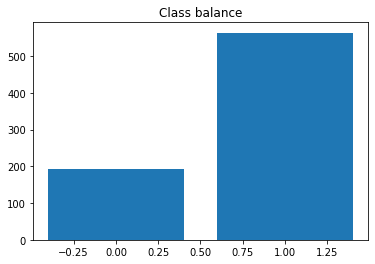

Minority class: 564
Majority class: 192
Proportion: 2.94 : 1


In [9]:
y = data[['class']]

target_count = pd.value_counts(y.values.flatten())
plt.figure()
plt.title('Class balance')
plt.bar(target_count.index, target_count.values)
plt.show()

min_class = target_count.idxmin()
ind_min_class = target_count.index.get_loc(min_class)

print('Minority class:', target_count[ind_min_class])
print('Majority class:', target_count[1-ind_min_class])
print('Proportion:', round(target_count[ind_min_class] / target_count[1-ind_min_class], 2), ': 1')

## As we don't know much about the variables and it's would be almost impossible to analyze the behaviour of all the 755 variables let's select some important ones and do exploratory analysis on them

#### Let's explore the correlation between those variables and remove some that are very correlated within the classes

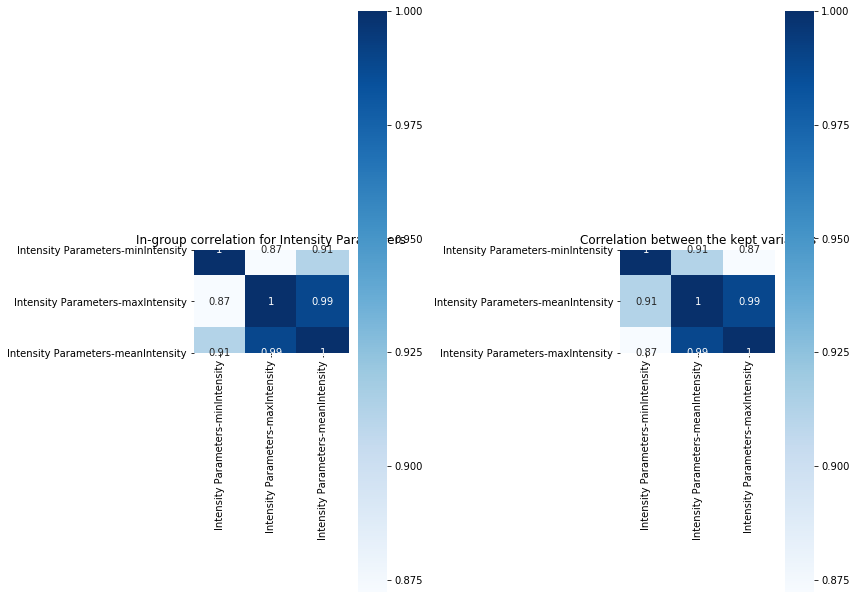

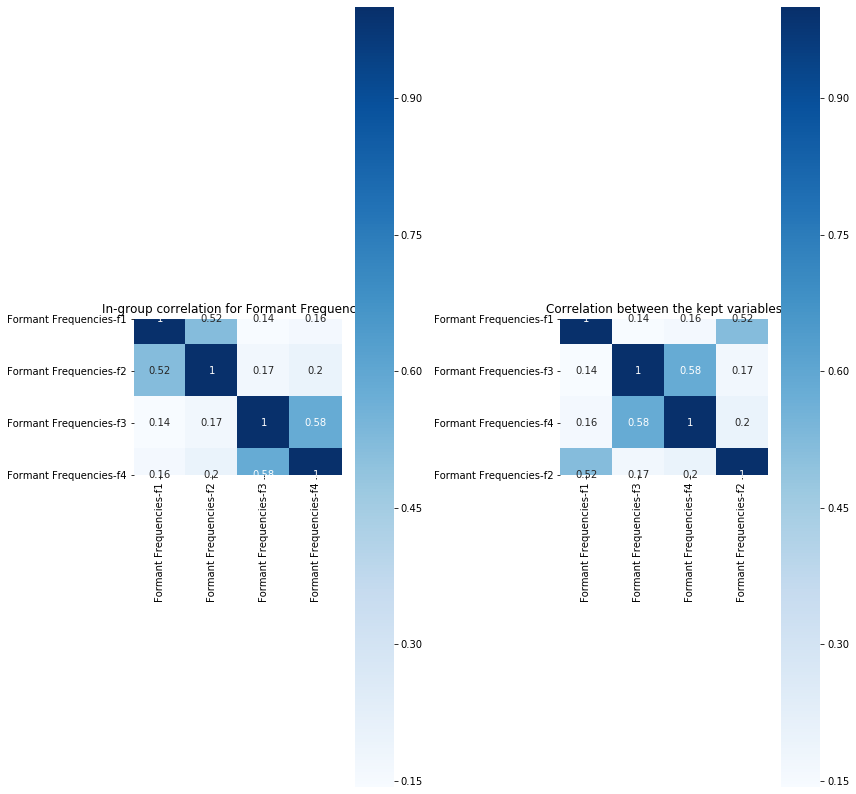

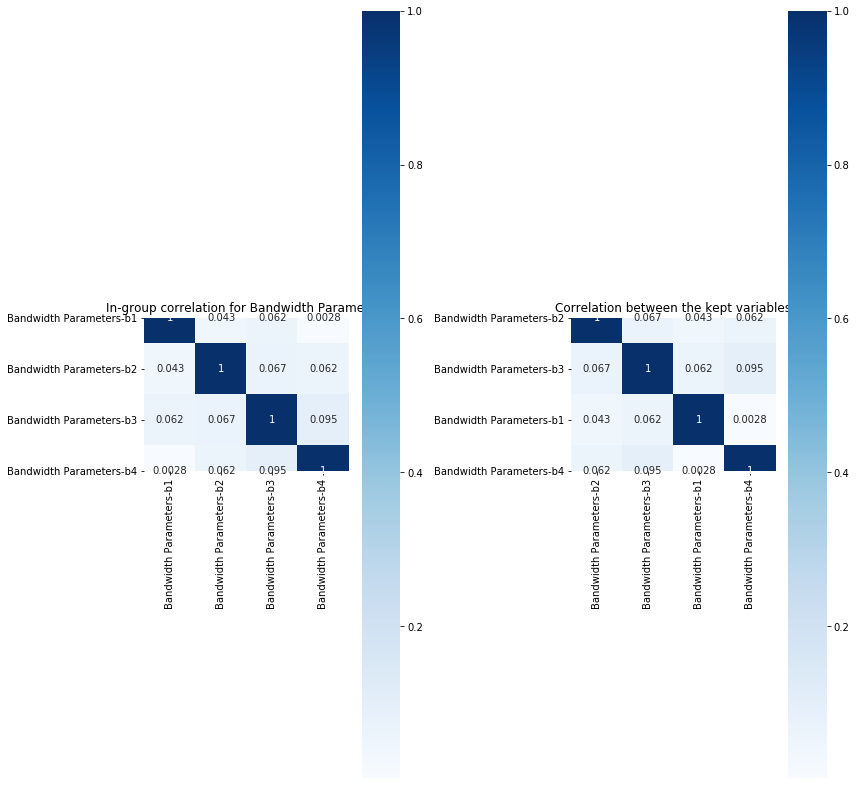

(756, 755)


-gender  -id  Baseline Features-meanPeriodPulses  Baseline Features-locAbsJitter  Baseline Features-stdDevPeriodPulses  Baseline Features-locShimmer  Baseline Features-DFA  Baseline Features-apq3Shimmer  Baseline Features-RPDE  Baseline Features-locPctJitter  Baseline Features-meanAutoCorrHarmonicity  Baseline Features-PPE  Baseline Features-apq5Shimmer  Baseline Features-meanNoiseToHarmHarmonicity  Baseline Features-locDbShimmer  Baseline Features-meanHarmToNoiseHarmonicity  Baseline Features-apq11Shimmer  Baseline Features-rapJitter  Baseline Features-ppq5Jitter  Baseline Features-numPulses  Baseline Features-ddpJitter  Baseline Features-ddaShimmer  Baseline Features-numPeriodsPulses  Intensity Parameters-minIntensity  Intensity Parameters-meanIntensity  Intensity Parameters-maxIntensity  Formant Frequencies-f1  Formant Frequencies-f3  Formant Frequencies-f4  Formant Frequencies-f2  Bandwidth Parameters-b2  Bandwidth Parameters-b3  Bandwidth Parameters-b1  \
0        1    0                            0.932711                        0.037818                             -0.406982                     -0.201150               0.255975                      -0.190700                0.605434                       -0.054957                                   0.145047               0.627229                      -0.228779                                     -0.142556                       -0.233734                                      0.024275                       -0.208796                     0.066285                      0.078149                    -0.846332                     0.062852                     -0.190551                           -0.841816                          -0.093823                           -0.218224                          -0.007341               -0.799003               -0.293055                0.309878               -1.194645                -0.475482                -0.373314                -0.365732   
1        1    0                            1.039326                       -0.027680                             -0.425810                     -0.286561              -0.080380                      -0.499656                0.368171                       -0.142476                                   0.355937               0.121539                      -0.162885                                     -0.317054                       -0.272943                                      0.472946                        0.193984                    -0.086665                     -0.023240                    -0.906804                    -0.083304                     -0.499508                           -0.902176                          -0.385257                           -0.351676                          -0.479178               -0.613605               -0.454749               -0.139645               -1.286204                -0.468062                -0.382405                -0.504592   
2        1    0                            1.083858                       -0.088812                             -0.443263                      0.734174              -0.349607                       0.740638                0.733124                       -0.214774                                   0.208094               0.617541                       0.875955                                     -0.237316                        0.759549                                     -0.216738                        0.658639                    -0.035681                     -0.029204                    -0.926961                    -0.035719                      0.740643                           -0.922296                          -0.921953                           -0.842180                          -0.698341               -0.731561               -0.520189                0.376208               -1.191349                -0.538714                -0.510546                -0.172572   
3        0    1                            2.462585                        1.256087        

In [10]:
def get_important_column_names(df, correlation_threshold=0):
    superclasses = list(dict.fromkeys([c.split('-')[0] for c in df.columns]))
    groups = {c: [] for c in superclasses}
    for c in df.columns:
        groups[c.split('-')[0]].append(c)
    
    important_columns = []
    for i, (group_name, columns) in enumerate(groups.items()):
        corr_matrix = df[columns].corr().abs()                                               # Calculate the correlation within group
        upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))  # Select upper triangle of correlation matrix
        to_drop = [column for column in upper.columns if any(upper[column] > correlation_threshold)]
        to_keep = list(set(columns) - set(to_drop))
        important_columns += to_keep
        
        # Plot the correlation
        if i == 0 or i == len(groups.values()) - 1 or len(columns) > 10:
            continue
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 30))
        axes[0].set_title(f'In-group correlation for {group_name}')
        sns.heatmap(corr_matrix, ax=axes[0], xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns, annot=True, cmap='Blues', square=True)
        
        corr_matrix = df[to_keep].corr().abs()
        axes[1].set_title('Correlation between the kept variables')
        sns.heatmap(corr_matrix, ax=axes[1], xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns, annot=True, cmap='Blues', square=True)
        
        fig.tight_layout()
        plt.show()
    return important_columns


importants = get_important_column_names(data, correlation_threshold=CORRELATION_THRESHOLD)
importants = data[importants]
print(importants.shape)
importants.head()

In [11]:
columns = importants.select_dtypes(include='number').columns
rows, cols = func.choose_grid(len(columns))
plt.figure()
fig, axs = plt.subplots(rows, cols, figsize=(cols*4, rows*4), squeeze=False)
i, j = 0, 0
for n in range(len(columns)):
    axs[i, j].set_title('Boxplot for %s'%columns[n])
    axs[i, j].boxplot(data[columns[n]].dropna().values)
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
fig.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

In [ ]:
columns = importants.select_dtypes(include='number').columns
rows, cols = func.choose_grid(len(columns))
plt.figure()
fig, axs = plt.subplots(rows, cols, figsize=(cols*4, rows*4), squeeze=False)
i, j = 0, 0
for n in range(len(columns)):
    axs[i, j].set_xlabel(columns[n])
    axs[i, j].set_ylabel("probability")
    axs[i, j].hist(data[columns[n]].dropna().values, 'auto')
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
fig.tight_layout()
plt.show()

In [ ]:
import scipy.stats as _stats 
def compute_known_distributions(x_values, n_bins) -> dict:
    distributions = dict()
    # Gaussian
    mean, sigma = _stats.norm.fit(x_values)
    distributions['Normal(%.1f,%.2f)'%(mean,sigma)] = _stats.norm.pdf(x_values, mean, sigma)
    # LogNorm
  #  sigma, loc, scale = _stats.lognorm.fit(x_values)
  #  distributions['LogNor(%.1f,%.2f)'%(np.log(scale),sigma)] = _stats.lognorm.pdf(x_values, sigma, loc, scale)
    # Exponential
    loc, scale = _stats.expon.fit(x_values)
    distributions['Exp(%.2f)'%(1/scale)] = _stats.expon.pdf(x_values, loc, scale)
    # SkewNorm
   # a, loc, scale = _stats.skewnorm.fit(x_values)
   # distributions['SkewNorm(%.2f)'%a] = _stats.skewnorm.pdf(x_values, a, loc, scale) 
    return distributions

def histogram_with_distributions(ax: plt.Axes, series: pd.Series, var: str):
    values = series.sort_values().values
    n, bins, patches = ax.hist(values, 20, density=True, edgecolor='grey')
    distributions = compute_known_distributions(values, bins)
    func.multiple_line_chart(ax, values, distributions, 'Best fit for %s'%var, var, 'probability')

columns = importants.select_dtypes(include='number').columns
rows, cols = func.choose_grid(len(columns))
plt.figure()
fig, axs = plt.subplots(rows, cols, figsize=(cols*4, rows*4), squeeze=False)
i, j = 0, 0
for n in range(len(columns)):
    histogram_with_distributions(axs[i, j], data[columns[n]].dropna(), columns[n])
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
fig.tight_layout()
plt.show()

## Multi-Variate Analysis
##### Again, as the dataset is too large in terms of the number of columns, we will concentrate on the variables that are important based the previous findings

In [12]:
columns = importants.select_dtypes(include='number').columns

if len(columns) < 30:
    rows, cols = len(columns)-1, len(columns)-1
    plt.figure()
    fig, axs = plt.subplots(rows, cols, figsize=(cols*4, rows*4), squeeze=False)
    for i in range(len(columns)):
        var1 = columns[i]
        for j in range(i+1, len(columns)):
            var2 = columns[j]
            axs[i, j-1].set_title("%s x %s"%(var1,var2))
            axs[i, j-1].set_xlabel(var1)
            axs[i, j-1].set_ylabel(var2)
            axs[i, j-1].scatter(data[var1], data[var2])
    fig.tight_layout()
    plt.show()

In [13]:
if len(columns) < 30:
    fig = plt.figure(figsize=[12, 12])
    corr_mtx = importants.corr()
    sns.heatmap(corr_mtx, xticklabels=corr_mtx.columns, yticklabels=corr_mtx.columns, annot=True, cmap='Blues')
    plt.title('Correlation analysis')
    plt.show()

## Classification

In [14]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.utils.class_weight import compute_class_weight

## 0. Data split and class weight calculation

In [15]:
X = importants.loc[:, ~importants.columns.isin(['class'])]
y = importants.loc[:, importants.columns.isin(['class'])]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
class_weight = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train.values.flatten())
print('Class weights:', class_weight)

Class weights: [2.01908397 0.66457286]


### 1. Naive bayes

              precision    recall  f1-score   support

           0       0.56      0.66      0.60        61
           1       0.86      0.81      0.83       166

   micro avg       0.77      0.77      0.77       227
   macro avg       0.71      0.73      0.72       227
weighted avg       0.78      0.77      0.77       227

Accuracy: 0.7665198237885462
ROC AUC: 0.7314833102903417


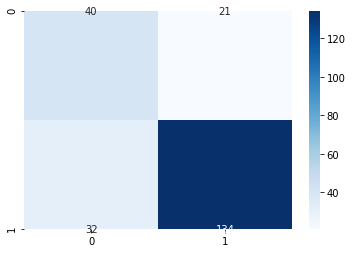

In [16]:
clf = GaussianNB()
clf.fit(X_train, y_train.values.flatten())
y_pred = clf.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('ROC AUC:', metrics.roc_auc_score(y_test, y_pred))
cnf_mtx = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(cnf_mtx, annot=True, cmap='Blues', fmt='g')

### 2. KNN

<Figure size 432x288 with 0 Axes>

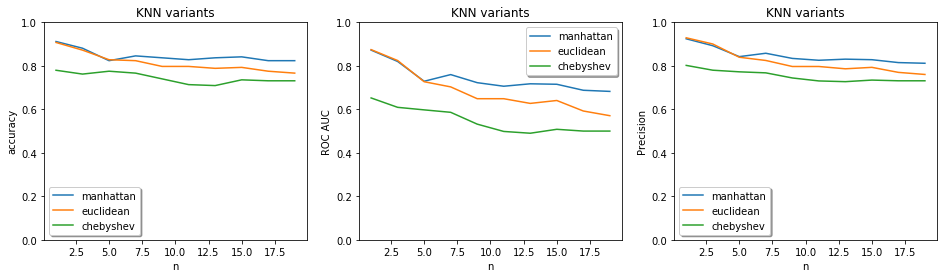

<Figure size 432x288 with 0 Axes>

In [17]:
from sklearn.neighbors import KNeighborsClassifier

nvalues = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
dist = ['manhattan', 'euclidean', 'chebyshev']
plt.figure()
fig, axs = plt.subplots(1, 3, figsize=(16, 4), squeeze=False)

acc, auc, precision = {}, {}, {}
for d in dist:
    acc[d], auc[d], precision[d] = [], [], []
    for n in nvalues:
        knn = KNeighborsClassifier(n_neighbors=n, metric=d)
        knn.fit(X_train, y_train.values.flatten())
        y_pred = knn.predict(X_test)
        acc[d].append(metrics.accuracy_score(y_test, y_pred))
        auc[d].append(metrics.roc_auc_score(y_test, y_pred))
        precision[d].append(metrics.precision_score(y_test, y_pred))

plt.figure()
func.multiple_line_chart(axs[0, 0], nvalues, acc, 'KNN variants', 'n', 'accuracy', percentage=True)
func.multiple_line_chart(axs[0, 1], nvalues, auc, 'KNN variants', 'n', 'ROC AUC', percentage=True)
func.multiple_line_chart(axs[0, 2], nvalues, precision, 'KNN variants', 'n', 'Precision', percentage=True)
plt.show()

## 3. Decision Tree

<Figure size 432x288 with 0 Axes>

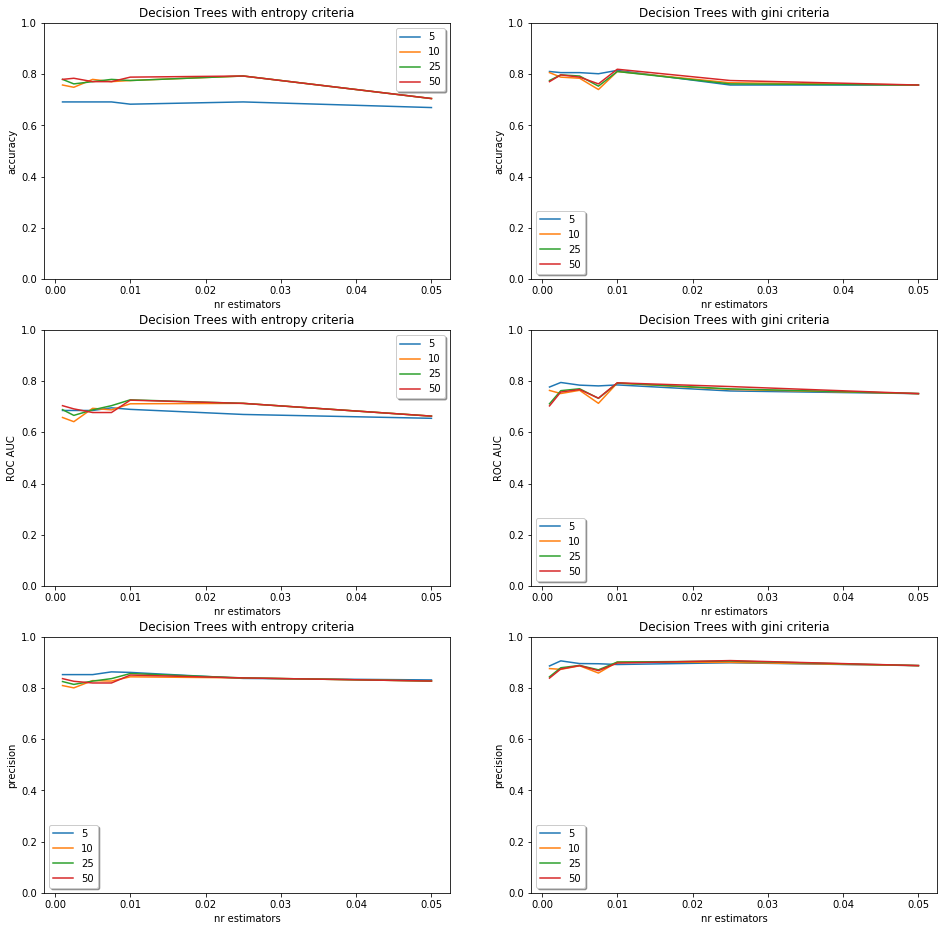

In [18]:
min_samples_leaf = [.05, .025, .01, .0075, .005, .0025, .001]
max_depths = [5, 10, 25, 50]
criteria = ['entropy', 'gini']

plt.figure()
fig, axs = plt.subplots(3, 2, figsize=(16, 16), squeeze=False)
for k in range(len(criteria)):
    f = criteria[k]
    acc, auc, precision = {}, {}, {}

    for d in max_depths:
        acc[d], auc[d], precision[d] = [], [], []
        for n in min_samples_leaf:
            tree = DecisionTreeClassifier(min_samples_leaf=n, max_depth=d, criterion=f, class_weight='balanced')
            tree.fit(X_train, y_train)
            y_pred = tree.predict(X_test)
            acc[d].append(metrics.accuracy_score(y_test, y_pred))
            auc[d].append(metrics.roc_auc_score(y_test, y_pred))
            precision[d].append(metrics.precision_score(y_test, y_pred))
    func.multiple_line_chart(axs[0, k], min_samples_leaf, acc, 'Decision Trees with %s criteria'%f, 'nr estimators', 'accuracy', percentage=True)
    func.multiple_line_chart(axs[1, k], min_samples_leaf, auc, 'Decision Trees with %s criteria'%f, 'nr estimators', 'ROC AUC', percentage=True)
    func.multiple_line_chart(axs[2, k], min_samples_leaf, precision, 'Decision Trees with %s criteria'%f, 'nr estimators', 'precision', percentage=True)
    
plt.show()

## 4. Random Forest

<Figure size 432x288 with 0 Axes>

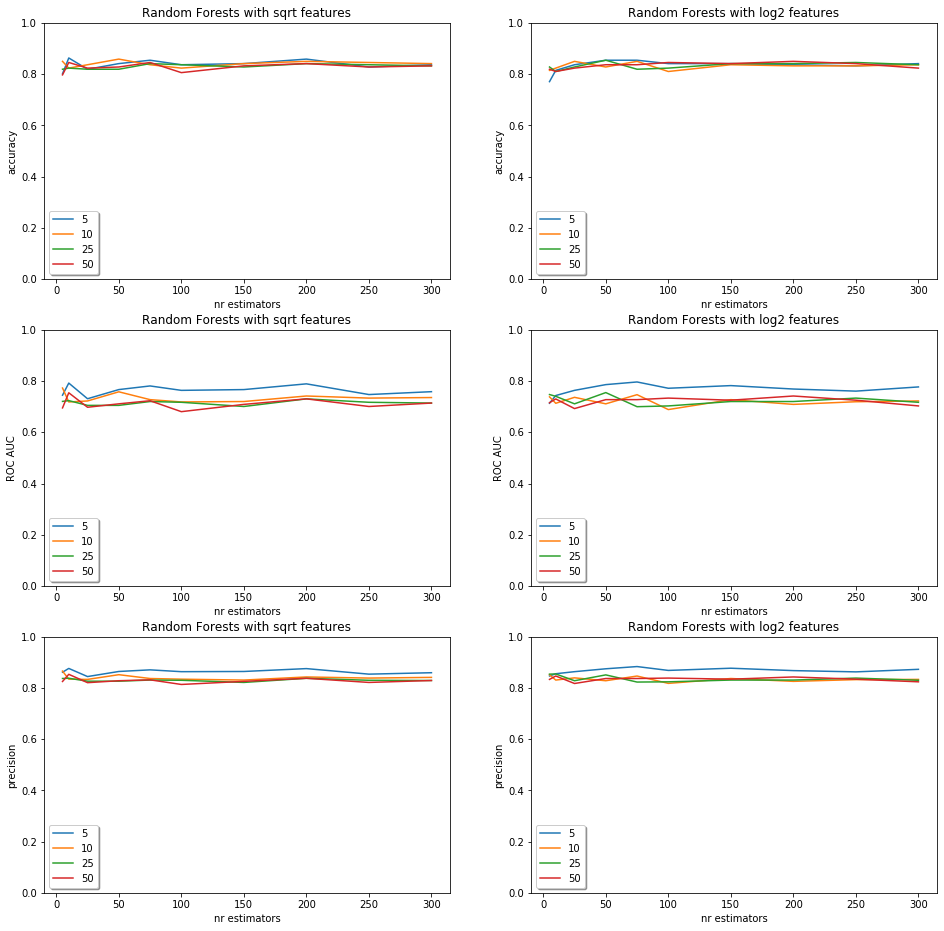

In [19]:
n_estimators = [5, 10, 25, 50, 75, 100, 150, 200, 250, 300]
max_depths = [5, 10, 25, 50]
max_features = ['sqrt', 'log2']

plt.figure()
fig, axs = plt.subplots(3, 2, figsize=(16, 16), squeeze=False)
for k in range(len(max_features)):
    f = max_features[k]
    acc, auc, precision = {}, {}, {}

    for d in max_depths:
        acc[d], auc[d], precision[d] = [], [], []
        for n in n_estimators:
            rf = RandomForestClassifier(n_estimators=n, max_depth=d, max_features=f, class_weight='balanced')
            rf.fit(X_train, y_train.values.flatten())
            y_pred = rf.predict(X_test)
            acc[d].append(metrics.accuracy_score(y_test, y_pred))
            auc[d].append(metrics.roc_auc_score(y_test, y_pred))
            precision[d].append(metrics.precision_score(y_test, y_pred))
    func.multiple_line_chart(axs[0, k], n_estimators, acc, 'Random Forests with %s features'%f, 'nr estimators', 'accuracy', percentage=True)
    func.multiple_line_chart(axs[1, k], n_estimators, auc, 'Random Forests with %s features'%f, 'nr estimators', 'ROC AUC', percentage=True)
    func.multiple_line_chart(axs[2, k], n_estimators, precision, 'Random Forests with %s features'%f, 'nr estimators', 'precision', percentage=True)
    
plt.show()

## 5. xgboost

In [20]:
import xgboost as xgb

In [21]:
D_train = xgb.DMatrix(X_train, label=y_train)
D_test = xgb.DMatrix(X_test, label=y_test)

<Figure size 432x288 with 0 Axes>

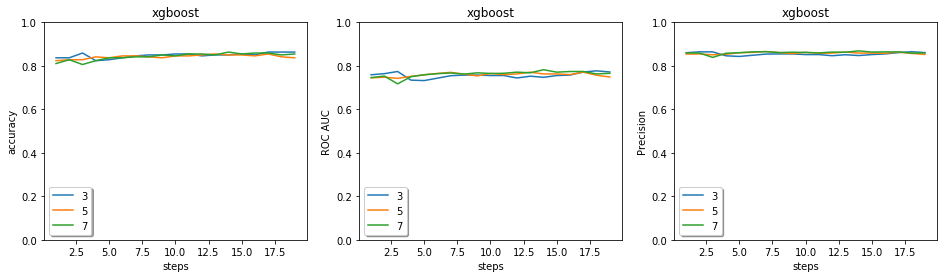

<Figure size 432x288 with 0 Axes>

In [22]:
nb_steps = list(range(1, 20))
max_depth = [3, 5, 7]
plt.figure()
fig, axs = plt.subplots(1, 3, figsize=(16, 4), squeeze=False)

acc, auc, precision = {}, {}, {}
for d in max_depth:
    acc[d], auc[d], precision[d] = [], [], []
    for n in nb_steps:
        param = {
            'eta': 0.3, 
            'max_depth': d,  
            'objective': 'multi:softprob',  
            'num_class': 2
        } 
        model = xgb.train(param, D_train, n)
        preds = model.predict(D_test)
        y_pred = np.asarray([np.argmax(line) for line in preds])

        acc[d].append(metrics.accuracy_score(y_test, y_pred))
        auc[d].append(metrics.roc_auc_score(y_test, y_pred))
        precision[d].append(metrics.precision_score(y_test, y_pred))

plt.figure()
func.multiple_line_chart(axs[0, 0], nb_steps, acc, 'xgboost', 'steps', 'accuracy', percentage=True)
func.multiple_line_chart(axs[0, 1], nb_steps, auc, 'xgboost', 'steps', 'ROC AUC', percentage=True)
func.multiple_line_chart(axs[0, 2], nb_steps, precision, 'xgboost', 'steps', 'Precision', percentage=True)
plt.show()

## Export the notebook

In [23]:
import os
os.system(f'jupyter nbconvert --output html_notebooks/project-threshold-{CORRELATION_THRESHOLD}.html --to html Project1.ipynb')

0